# 101에서 110까지 구하기
## 0. 관련 모듈 불러오기

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

## 1. 데이터 준비
#### 데이터와 정답(학습과 테스트)

In [2]:
x_train = np.array([1,2,3,4,5,6,7,8,9,10])
y_train = np.array([1,2,3,4,5,6,7,8,9,10])
x_test = np.array([101,102,103,104,105,106,107,108,109,110])
y_test = np.array([101,102,103,104,105,106,107,108,109,110])

# 2. 모델 구성
#### 모델 생성
* 얼마나 많은 레이어와 노드를 준비할 것인가 설계
* Dense(5, input_dim=1) : 1개의 입력으로 5개의 노드로 출력한다는 의미

In [10]:
model = Sequential()
model.add(Dense(5, input_dim=1, activation='relu'))
#model.add(Dense(5, input_dim=1))
model.add(Dense(3))
model.add(Dense(1, activation='relu'))
#model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 10        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


## 3. 컴파일 및 훈련
#### 모델 컴파일
* 모델을 실행시키지 전에 머신이 이해할 수 있도록 컴파일 시킴
* loss : 손실 마수는 어떤 것을 사용할 것인가? 
* optimizer : 최적화 함수는? 
* metrics : 어떤 방식? 

In [11]:
model.compile(optimizer='adam',loss='mse', metrics=['accuracy'])

#### 모델 실행
* epochs : 훈련 횟수
* batch_size : 몇 개씩 끊어서 작업을 할 것인가를 의미 
    - batch_size를 크게 잡을 경우 속도가 빨라지지만 정확도가 떨어짐
    - 작게 잡을 경우 속도는 떨어지지만 정확도는 올라감

In [12]:
hist = model.fit(x_train, y_train, epochs=100, batch_size=1,validation_data = (x_test, y_test))

Train on 10 samples, validate on 10 samples
Epoch 1/100
10/10 [==============================] - 0s 29ms/sample - loss: 32.5383 - accuracy: 0.0000e+00 - val_loss: 8965.1120 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 3ms/sample - loss: 29.2121 - accuracy: 0.0000e+00 - val_loss: 8091.4893 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 3ms/sample - loss: 26.1816 - accuracy: 0.0000e+00 - val_loss: 7278.1504 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 3ms/sample - loss: 22.8252 - accuracy: 0.0000e+00 - val_loss: 6621.4238 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 3ms/sample - loss: 20.4798 - accuracy: 0.0000e+00 - val_loss: 5940.9871 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 3ms/sample - loss: 17.9372 - accuracy: 0.0000e+00 - val_loss: 5338.7465 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [======

10/10 [==============================] - 0s 3ms/sample - loss: 0.0955 - accuracy: 0.1000 - val_loss: 92.7835 - val_accuracy: 0.0000e+00
Epoch 56/100
10/10 [==============================] - 0s 3ms/sample - loss: 0.0947 - accuracy: 0.1000 - val_loss: 91.4710 - val_accuracy: 0.0000e+00
Epoch 57/100
10/10 [==============================] - 0s 3ms/sample - loss: 0.0935 - accuracy: 0.1000 - val_loss: 92.0449 - val_accuracy: 0.0000e+00
Epoch 58/100
10/10 [==============================] - 0s 3ms/sample - loss: 0.0925 - accuracy: 0.1000 - val_loss: 91.0179 - val_accuracy: 0.0000e+00
Epoch 59/100
10/10 [==============================] - 0s 3ms/sample - loss: 0.0909 - accuracy: 0.1000 - val_loss: 89.2026 - val_accuracy: 0.0000e+00
Epoch 60/100
10/10 [==============================] - 0s 3ms/sample - loss: 0.0898 - accuracy: 0.1000 - val_loss: 87.5443 - val_accuracy: 0.0000e+00
Epoch 61/100
10/10 [==============================] - 0s 3ms/sample - loss: 0.0889 - accuracy: 0.1000 - val_loss: 86.81

#### 그래프 확인

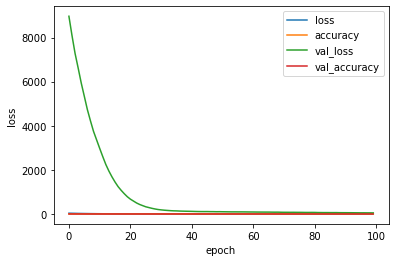

In [13]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_accuracy'])
#plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy', 'val_loss', 'val_accuracy'], loc='upper right')
plt.show()

## 4. 평가 및 예측

#### 모델 평가
* loss : 작을수록 좋음
* acc : 1에 가까울 수록 좋음

In [14]:
loss, acc = model.evaluate(x_test, y_test, batch_size=1)
print("loss :", loss)
print("acc :", acc)

10/10 [==============================] - 0s 2ms/sample - loss: 46.2448 - accuracy: 0.0000e+00
loss : 46.24475784301758
acc : 0.0


#### 예측하기

In [15]:
output = model.predict(x_test)
print("결과물 : \n", output)

결과물 : 
 [[ 94.51246 ]
 [ 95.443596]
 [ 96.37473 ]
 [ 97.305855]
 [ 98.236946]
 [ 99.16808 ]
 [100.099205]
 [101.03036 ]
 [101.961464]
 [102.892586]]
